Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Linear Regression on MT cars dataset:
Linear Regression y = 0.02*x + 0.12
Mean Squared Error (MSE): 0.8255674321865852
Root Mean Squared Error (RMSE): 0.9086074136757774
R2 Score: 0.3475354164976988
SSR: 8.555132526152704
SSE: 5.778972025306096
SST: 8.857142857142858


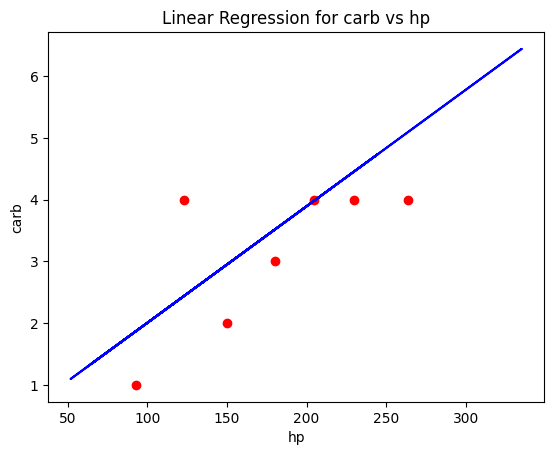

Linear Regression on Aablone dataset:
Linear Regression y = 14.77*x + 2.19
Mean Squared Error (MSE): 7.286742163309348
Root Mean Squared Error (RMSE): 2.6993966294913663
R2 Score: 0.3290484882709387
SSR: 2677.1007668242974
SSE: 6091.716448526615
SST: 9079.220095693781


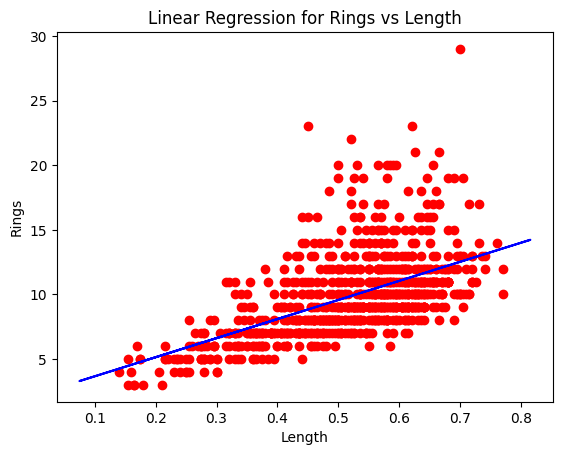

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from google.colab import drive
drive.mount('/content/drive')
def performLinearRegression(df, X_col, y_col, test_size=0.2, random_state=0):
    X = df[X_col].values.reshape(-1,1)
    y = df[y_col].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    slope=regressor.coef_[0]
    intercept=regressor.intercept_

    print(f'Linear Regression y = {slope:.2f}*x + {intercept:.2f}')
    y_pred = regressor.predict(X_test)

    print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('R2 Score:', r2_score(y_test, y_pred))

    # Calculate and print SSR, SSE, SST
    ssr = np.sum((y_pred - np.mean(y_test))**2)
    sse = np.sum((y_test - y_pred)**2)
    sst = np.sum((y_test - np.mean(y_test))**2)

    print('SSR:', ssr)
    print('SSE:', sse)
    print('SST:', sst)

    plt.scatter(X_test, y_test, color='red')
    plt.plot(X_train, regressor.predict(X_train), color='blue')
    plt.title(f'Linear Regression for {y_col} vs {X_col}')
    plt.xlabel(X_col)
    plt.ylabel(y_col)
    plt.show()

print('****Linear Regression on MT cars dataset***')
mtcars=pd.read_csv('/content/drive/My Drive/mtcars.csv')
performLinearRegression(mtcars,'hp','carb')
print('****Linear Regression on Aablone dataset****')
abalone=pd.read_csv('/content/drive/My Drive/abalone.csv')
performLinearRegression(abalone,'Length','Rings')
